# Sentiment analysis using Google language

- Input: Statements in English 
- Output: Overall sentiment of statements. Categorising the sentiment score

### STEPS implemented:
1. Function which takes English statement as input (in string format)
2. Calling API, print Sentiment score and magnititude
3. Returns Sentiment Score
4. Categorising English statement based on the sentiment score


#### Note that Google API allows 0–5K UNITS/MONTH is free above that price will be applicable as of now

In [5]:
from google.cloud import language
from google.cloud.language import enums
from google.cloud.language import types

In [8]:
def analyse_sentiment(stmt):
    # Instantiates a client
    client = language.LanguageServiceClient()

    # The text to analyze
    text = stmt
    document = types.Document(
        content=text,
        type=enums.Document.Type.PLAIN_TEXT)

    # Detects the sentiment of the text
    sentiment = client.analyze_sentiment(document=document).document_sentiment

    print('Text: {}'.format(text))
    print('Sentiment Score and Magnitude: {}, {}'.format(sentiment.score, sentiment.magnitude))
    #magnitude shows emmotions 
    return sentiment.score

In [10]:
SentimentScore = analyse_sentiment(stmt = 'I think this is very good idea. We should try this API') 
# for two statements its returning the two values

Text: I think this is very good idea. We should try this API
Sentiment Score and Magnitude: 0.4000000059604645, 0.8999999761581421


## Categorising the sentiment score
Google Sentiment score categories are:
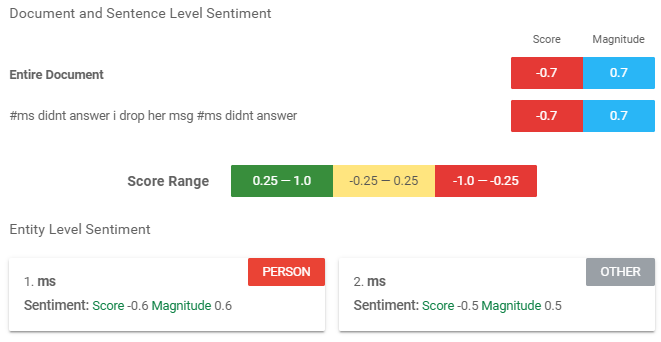

### -1 Very Negative to 1 Very Possitive

In [16]:
def categorising_sentiment_score(SentiScore):
    if (SentiScore == -1): #-1 to -0.25 very negative
        Sentiment = 'VERY NEGATIVE'
    elif ((-0.25 > SentiScore) & (SentiScore > -1)): #-1 to -0.25 negative
        Sentiment = 'NEGATIVE'
    elif ((0.25 > SentiScore) & (SentiScore > -0.25)): #-0.25 to 0.25 Neutral
        Sentiment = 'NEUTRAL'
    elif ((1 > SentiScore) & (SentiScore > 0.25)): #0.25 to 1 Very possitive
        Sentiment = 'VERY POSSITIVE'
    else:
        Sentiment = 'POSSITIVE'
    return Sentiment

In [17]:
categorising_sentiment_score(SentimentScore)

'VERY POSSITIVE'

### Now we will take a small passage as the input

In [18]:
InputPassage = """Philosophy of Education is a label applied to the study of the purpose, process, nature and ideals of education. It can be considered a branch of both philosophy and education. Education can be defined as the teaching and learning of specific skills, and the imparting of knowledge, judgment and wisdom, and is something broader than the societal institution of education we often speak of.

Many educationalists consider it a weak and woolly field, too far removed from the practical applications of the real world to be useful. But philosophers dating back to Plato and the Ancient Greeks have given the area much thought and emphasis, and there is little doubt that their work has helped shape the practice of education over the millennia."""
InputPassage  

'Philosophy of Education is a label applied to the study of the purpose, process, nature and ideals of education. It can be considered a branch of both philosophy and education. Education can be defined as the teaching and learning of specific skills, and the imparting of knowledge, judgment and wisdom, and is something broader than the societal institution of education we often speak of.\n\nMany educationalists consider it a weak and woolly field, too far removed from the practical applications of the real world to be useful. But philosophers dating back to Plato and the Ancient Greeks have given the area much thought and emphasis, and there is little doubt that their work has helped shape the practice of education over the millennia.'

In [19]:
SentimentScore = analyse_sentiment(stmt = InputPassage) 
# for two statements its returning the two values

Text: Philosophy of Education is a label applied to the study of the purpose, process, nature and ideals of education. It can be considered a branch of both philosophy and education. Education can be defined as the teaching and learning of specific skills, and the imparting of knowledge, judgment and wisdom, and is something broader than the societal institution of education we often speak of.

Many educationalists consider it a weak and woolly field, too far removed from the practical applications of the real world to be useful. But philosophers dating back to Plato and the Ancient Greeks have given the area much thought and emphasis, and there is little doubt that their work has helped shape the practice of education over the millennia.
Sentiment Score and Magnitude: 0.30000001192092896, 3.200000047683716


In [20]:
SentimentScore

0.30000001192092896

In [22]:
categorising_sentiment_score(SentimentScore)

'VERY POSSITIVE'